In [3]:
MODEL_LAYERS = {
    "google/gemma-3-270m-it": 18,
    "google/gemma-3-4b-it": 34, 
    "google/gemma-3-12b-it": 48,
    "Qwen/Qwen3-1.7B": 28,
    "Qwen/Qwen3-8b": 36,
    "Qwen/Qwen3-14B": 40,
    "EleutherAI/pythia-70m": 6,
    "EleutherAI/pythia-410m": 24,
    "EleutherAI/pythia-160m": 12,
}

Number of layers: 6
Processing layer 0.0
Processing layer 20.0
Processing layer 40.0
Processing layer 60.0
Processing layer 80.0
Processing layer 100.0

Data statistics:
            count      mean       std       min       25%       50%       75%  \
concept                                                                         
Language  30600.0  1.056471  0.024964  1.004136  1.052527  1.055356  1.076621   
Random     4140.0  1.063058  0.011102  1.021791  1.054346  1.066003  1.071309   
Safety     5220.0  1.107939  0.065536  1.013107  1.071646  1.087359  1.139094   

               max  
concept             
Language  1.095364  
Random    1.077153  
Safety    1.261600  


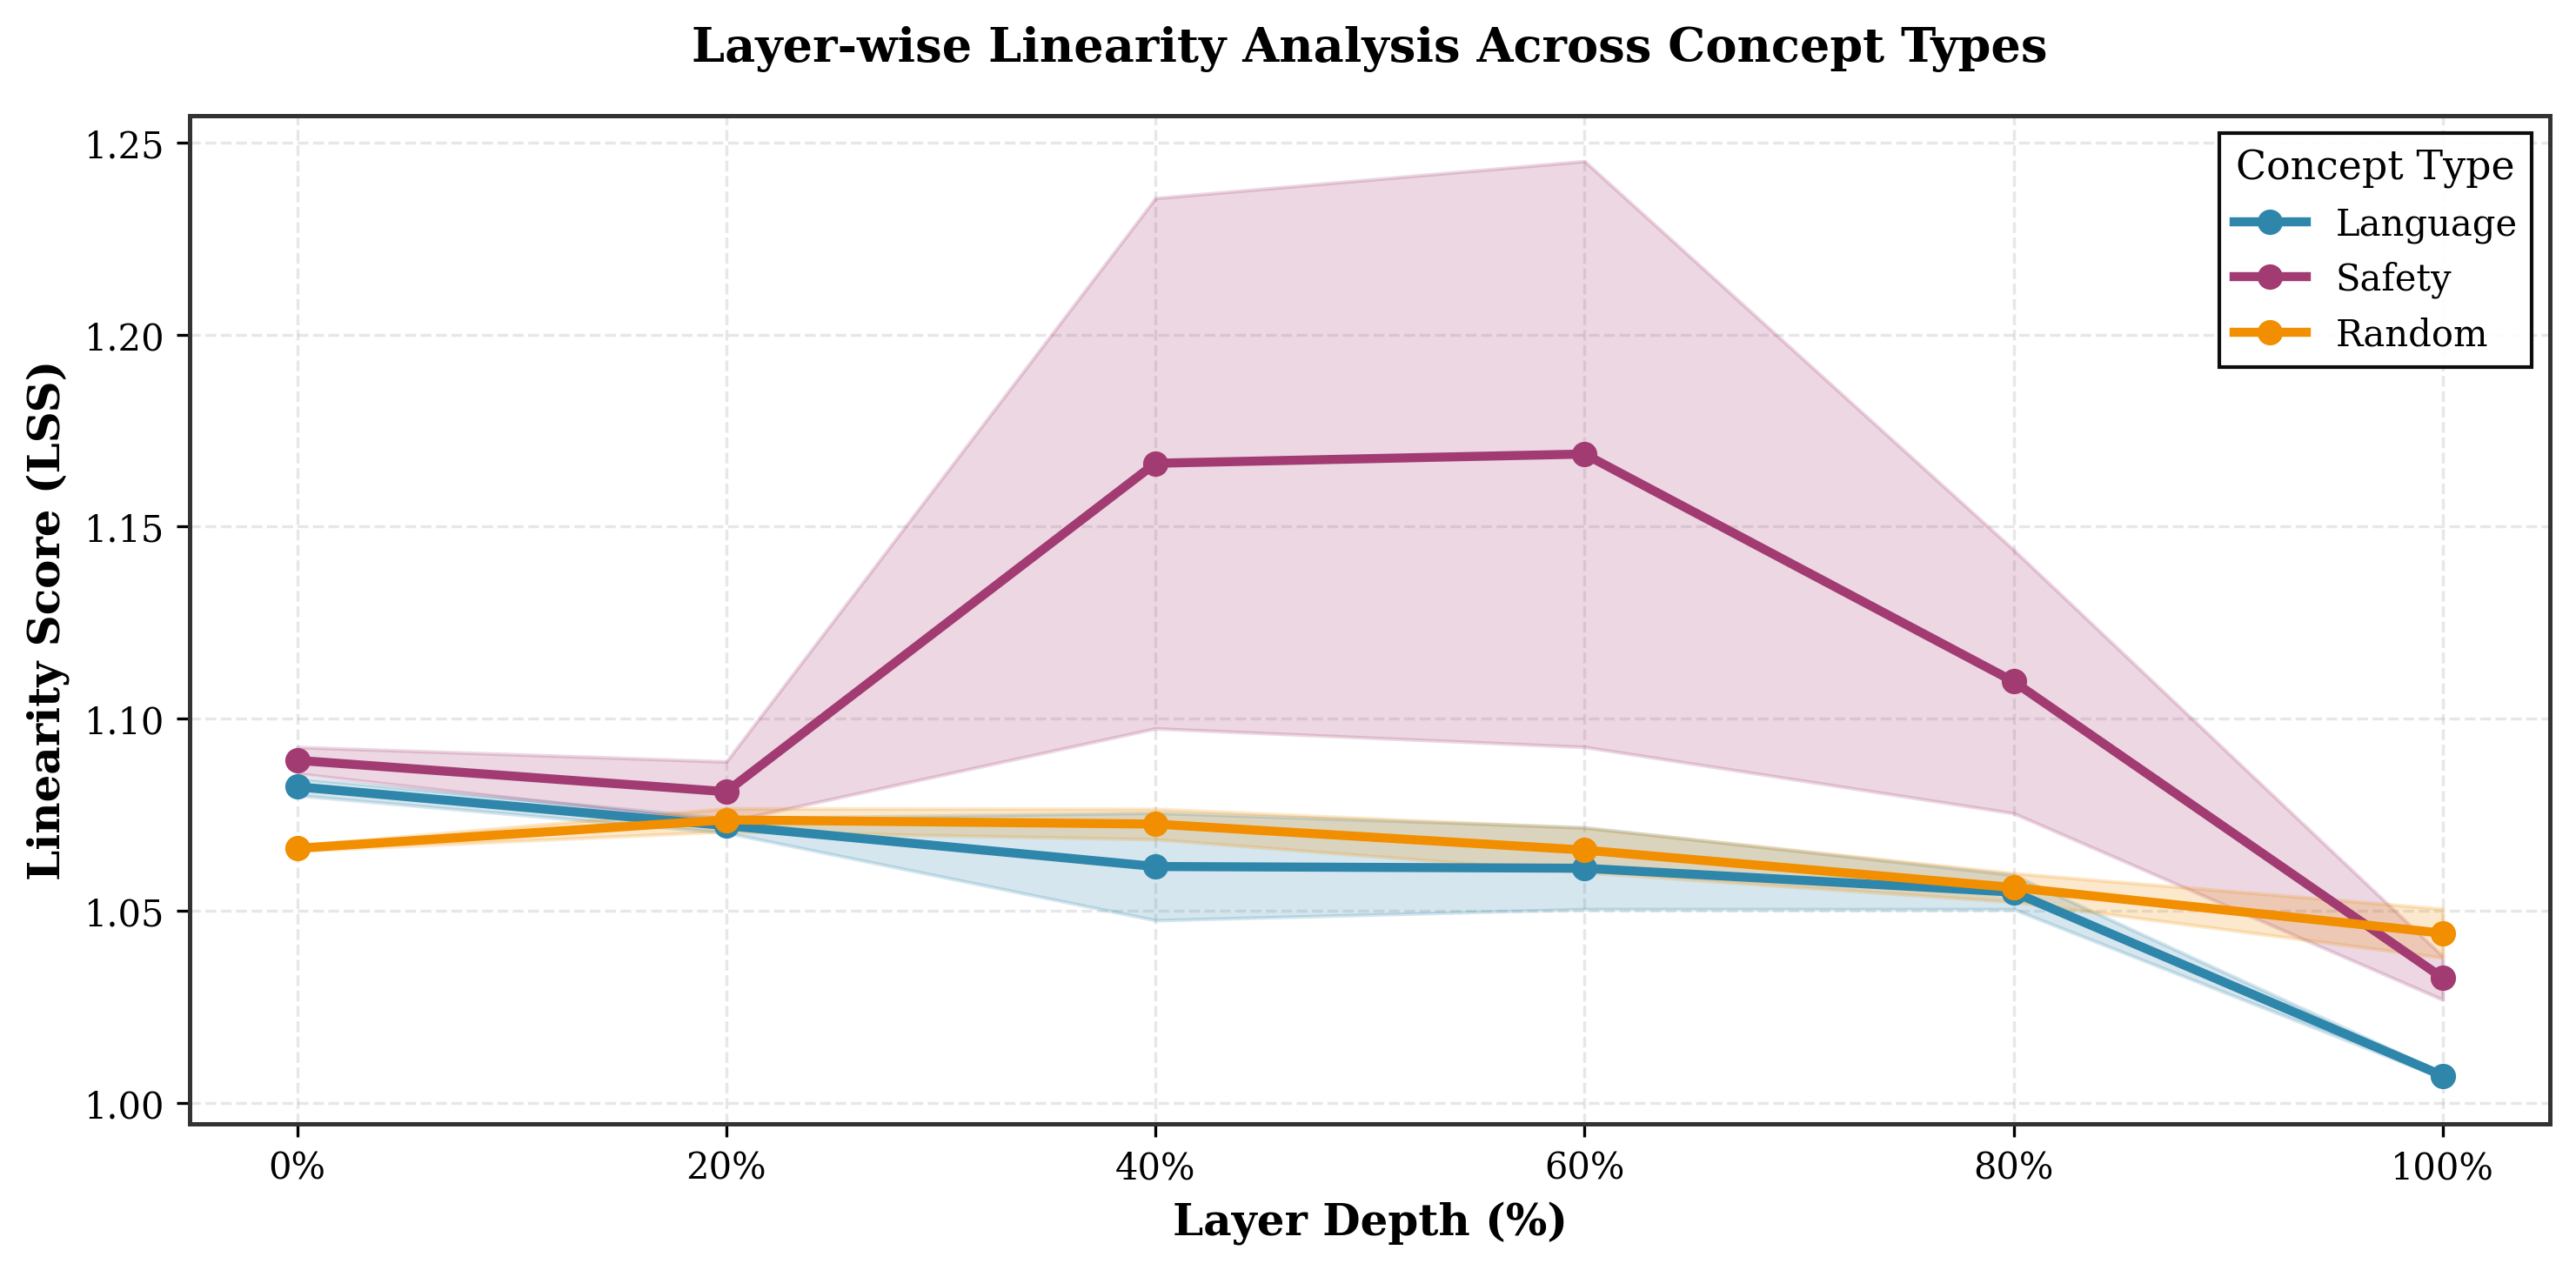

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
lang_conp = "../../assets/linearity/pythia-70m/lss_language_en_fr_layer{i}.pt"
safe_conp = "../../assets/linearity/pythia-70m/lss_safety_layer{i}.pt"
random_conp = "../../assets/linearity/pythia-70m/lss_random_layer{i}.pt"
# Load language concept results
lang_results = []
for i in range(6):
    lang_results.append(torch.load(lang_conp.format(i=i)))
safe_results = []
for i in range(6):
    safe_results.append(torch.load(safe_conp.format(i=i)))
random_results = []
for i in range(6):
    random_results.append(torch.load(random_conp.format(i=i)))

print(f"Loaded {len(lang_results)} language concept results")
print(f"Loaded {len(safe_results)} safety concept results")
print(f"Loaded {len(random_results)} random concept results")


# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Prepare data for plotting
data = []
num_layers = len(lang_results)
print(f"Number of layers: {num_layers}")

for i, (lang_val, safe_val, random_val) in enumerate(zip(lang_results, safe_results, random_results)):
    # Convert layer index to percentage
    if num_layers > 1:
        layer_percentage = (i / (num_layers - 1)) * 100
    else:
        layer_percentage = 0
    print(f"Processing layer {layer_percentage}")
    
    # Each result is a list, so we iterate directly
    for val in lang_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
    for val in safe_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
    for val in random_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})

df = pd.DataFrame(data)

# Print statistics for debugging
print("\nData statistics:")
print(df.groupby('concept')['value'].describe())

# Calculate mean and std for each layer and concept
stats_df = df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()

# Create publication-quality figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01'      # Warm orange
}

# Plot mean with std as shaded area for each concept
for concept in ['Language', 'Safety', 'Random']:
    concept_data = stats_df[stats_df['concept'] == concept]
    
    # Plot mean line
    ax.plot(concept_data['layer'], concept_data['mean'], 
            color=colors[concept], label=concept, 
            linewidth=2.5, marker='o', markersize=6)
    
    # Add shaded area for std
    ax.fill_between(concept_data['layer'], 
                    concept_data['mean'] - concept_data['std'],
                    concept_data['mean'] + concept_data['std'],
                    color=colors[concept], alpha=0.2)

# Enhance grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
ax.set_axisbelow(True)

# Labels and title
ax.set_xlabel('Layer Depth (%)', fontweight='bold')
ax.set_ylabel('Linearity Score (LSS)', fontweight='bold')
ax.set_title('Layer-wise Linearity Analysis Across Concept Types', 
             fontweight='bold', pad=15)

# Improve legend
ax.legend(title='Concept Type', 
          frameon=True, 
          fancybox=False,
          shadow=False,
          framealpha=0.95,
          edgecolor='black',
          loc='best')

# Set x-axis to show percentages
ax.set_xlim(-5, 105)
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# Add subtle spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

plt.tight_layout()
plt.savefig('../../assets/figs/linearity/linearity_analysis_lss.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


Loaded 12 language concept results
Loaded 12 safety concept results
Loaded 12 random concept results
Number of layers: 12
Processing layer 0.0
Processing layer 9.090909090909092
Processing layer 18.181818181818183
Processing layer 27.27272727272727
Processing layer 36.36363636363637
Processing layer 45.45454545454545
Processing layer 54.54545454545454
Processing layer 63.63636363636363
Processing layer 72.72727272727273
Processing layer 81.81818181818183
Processing layer 90.9090909090909
Processing layer 100.0

Data statistics:
            count      mean       std       min       25%       50%       75%  \
concept                                                                         
Language  61200.0  1.093225  0.045626  1.003839  1.066207  1.081844  1.115488   
Random     8280.0  1.122731  0.035188  1.027156  1.105167  1.126336  1.151087   
Safety    10440.0  1.287294  0.188314  1.009211  1.172427  1.198919  1.507789   

               max  
concept             
Language  1.212827

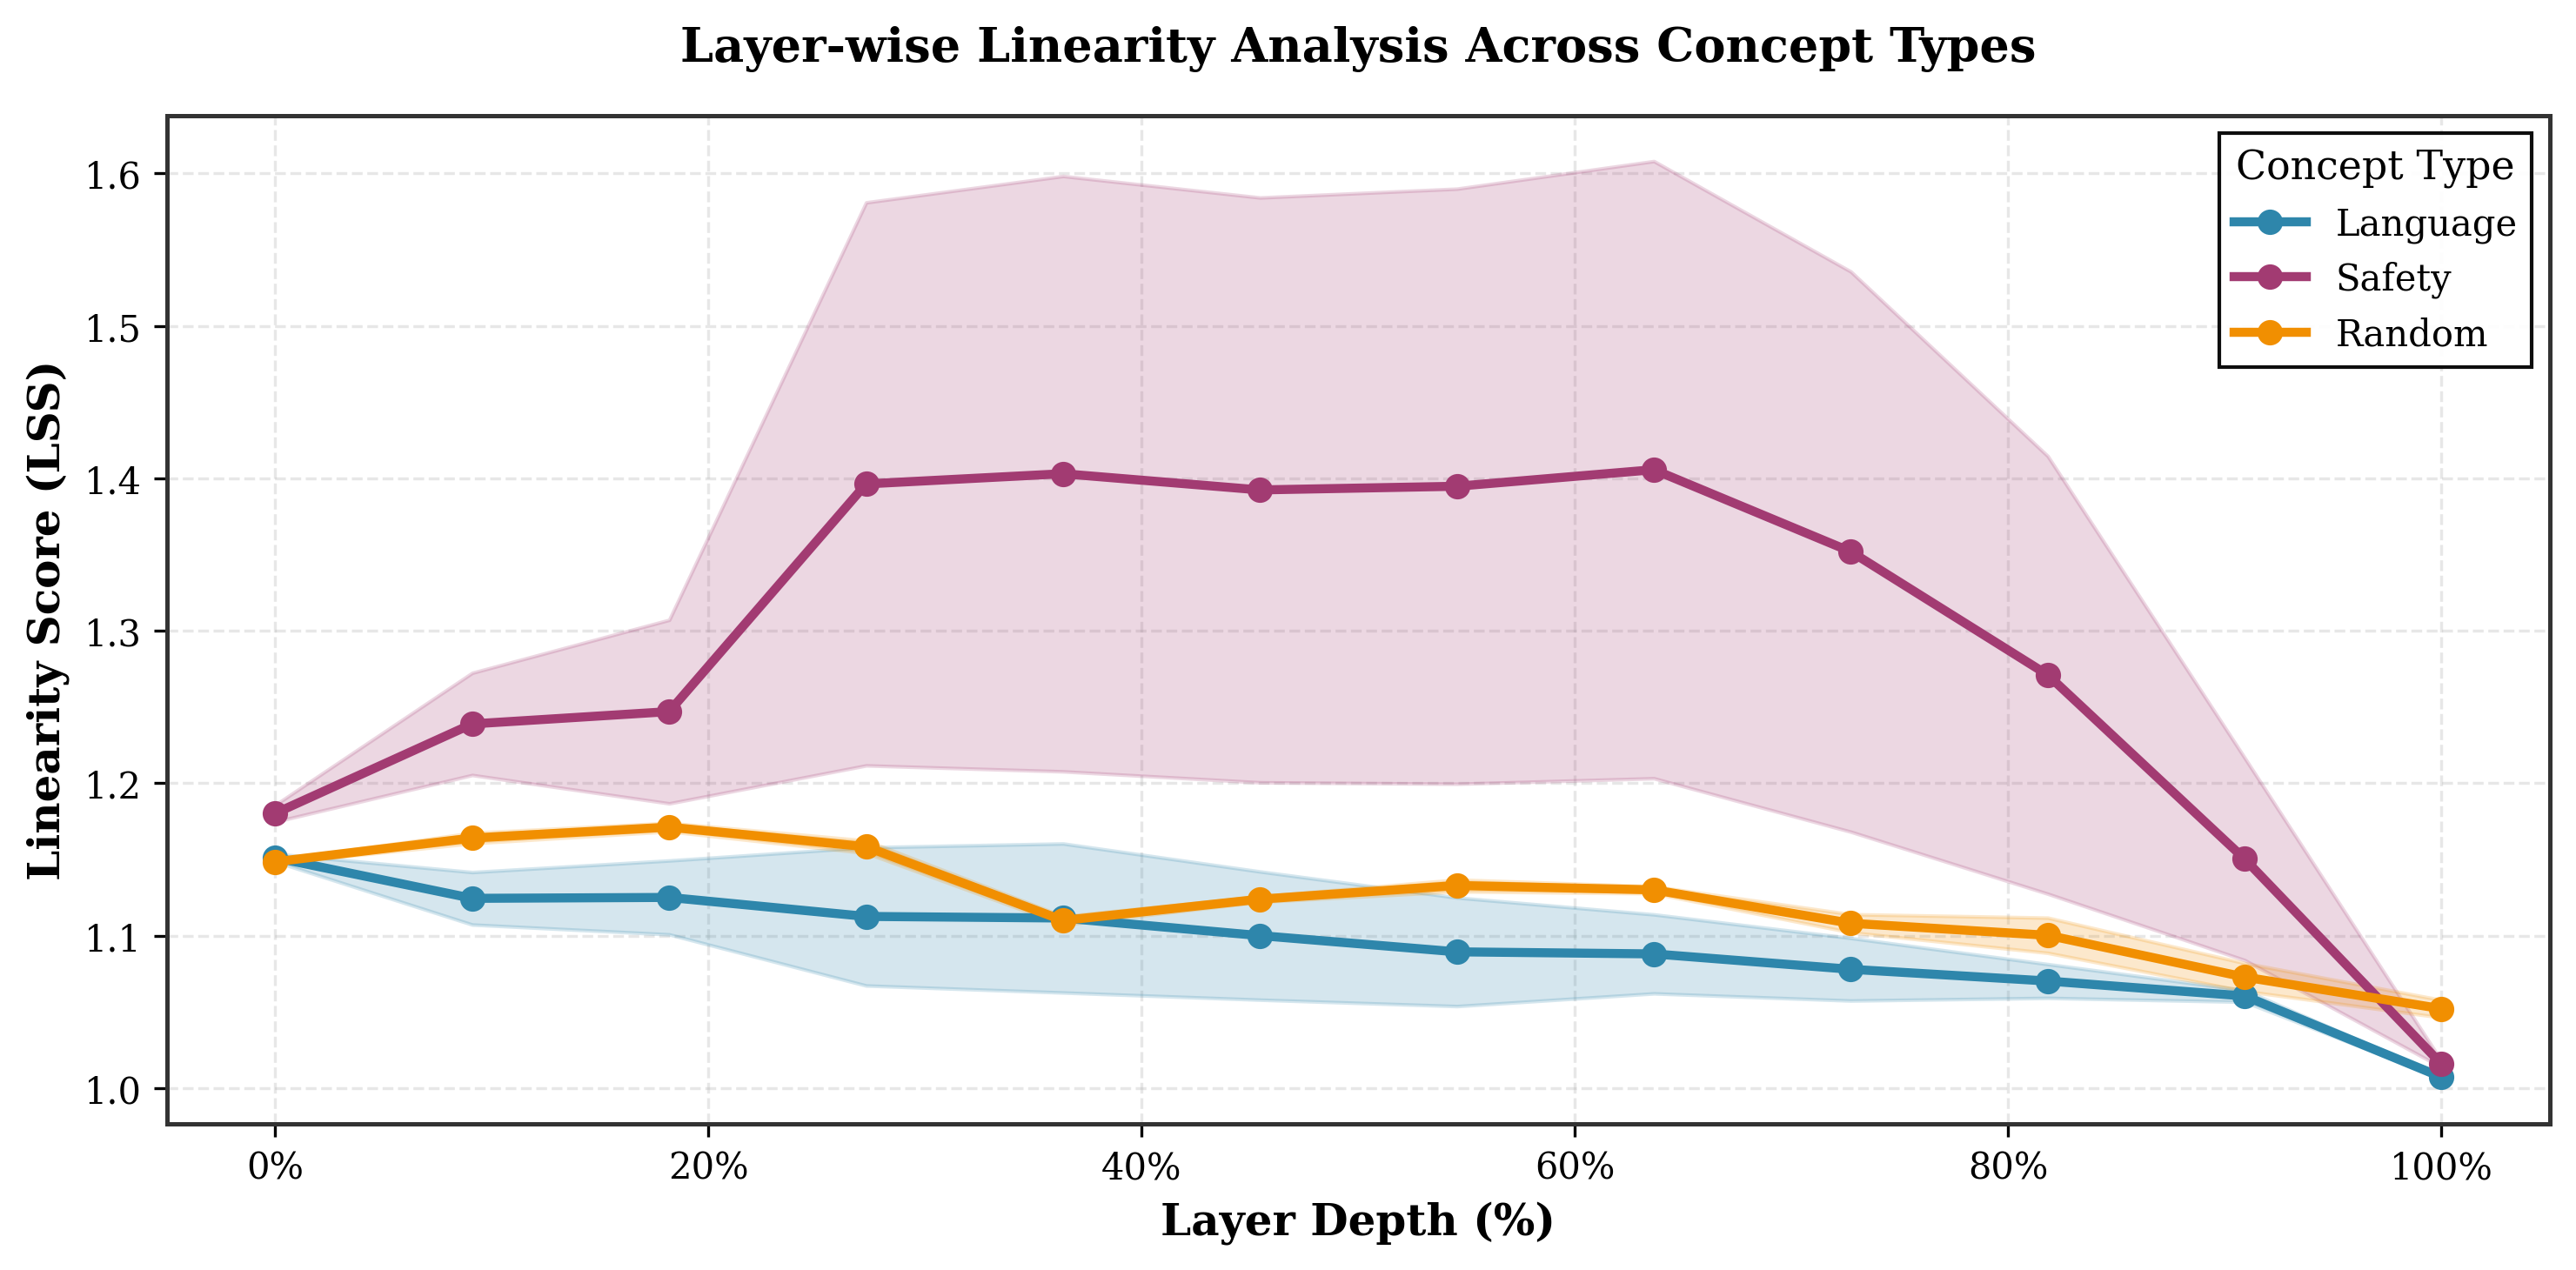

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
lang_conp = "../../assets/linearity/pythia-160m/lss_language_en_fr_layer{i}.pt"
safe_conp = "../../assets/linearity/pythia-160m/lss_safety_layer{i}.pt"
random_conp = "../../assets/linearity/pythia-160m/lss_random_layer{i}.pt"
# Load language concept results
lang_results = []
for i in range(12):
    lang_results.append(torch.load(lang_conp.format(i=i)))
safe_results = []
for i in range(12):
    safe_results.append(torch.load(safe_conp.format(i=i)))
random_results = []
for i in range(12):
    random_results.append(torch.load(random_conp.format(i=i)))

print(f"Loaded {len(lang_results)} language concept results")
print(f"Loaded {len(safe_results)} safety concept results")
print(f"Loaded {len(random_results)} random concept results")


# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Prepare data for plotting
data = []
num_layers = len(lang_results)
print(f"Number of layers: {num_layers}")

for i, (lang_val, safe_val, random_val) in enumerate(zip(lang_results, safe_results, random_results)):
    # Convert layer index to percentage
    if num_layers > 1:
        layer_percentage = (i / (num_layers - 1)) * 100
    else:
        layer_percentage = 0
    print(f"Processing layer {layer_percentage}")
    
    # Each result is a list, so we iterate directly
    for val in lang_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
    for val in safe_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
    for val in random_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})

df = pd.DataFrame(data)

# Print statistics for debugging
print("\nData statistics:")
print(df.groupby('concept')['value'].describe())

# Calculate mean and std for each layer and concept
stats_df = df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()

# Create publication-quality figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01'      # Warm orange
}

# Plot mean with std as shaded area for each concept
for concept in ['Language', 'Safety', 'Random']:
    concept_data = stats_df[stats_df['concept'] == concept]
    
    # Plot mean line
    ax.plot(concept_data['layer'], concept_data['mean'], 
            color=colors[concept], label=concept, 
            linewidth=2.5, marker='o', markersize=6)
    
    # Add shaded area for std
    ax.fill_between(concept_data['layer'], 
                    concept_data['mean'] - concept_data['std'],
                    concept_data['mean'] + concept_data['std'],
                    color=colors[concept], alpha=0.2)

# Enhance grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
ax.set_axisbelow(True)

# Labels and title
ax.set_xlabel('Layer Depth (%)', fontweight='bold')
ax.set_ylabel('Linearity Score (LSS)', fontweight='bold')
ax.set_title('Layer-wise Linearity Analysis Across Concept Types', 
             fontweight='bold', pad=15)

# Improve legend
ax.legend(title='Concept Type', 
          frameon=True, 
          fancybox=False,
          shadow=False,
          framealpha=0.95,
          edgecolor='black',
          loc='best')

# Set x-axis to show percentages
ax.set_xlim(-5, 105)
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# Add subtle spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

plt.tight_layout()
plt.savefig('../../assets/figs/linearity/linearity_analysis_lss.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
lang_conp = "../../assets/linearity/pythia-410m/lss_language_en_fr_layer{i}.pt"
safe_conp = "../../assets/linearity/pythia-410m/lss_safety_layer{i}.pt"
random_conp = "../../assets/linearity/pythia-410m/lss_random_layer{i}.pt"
# Load language concept results
lang_results = []
for i in range(24):
    lang_results.append(torch.load(lang_conp.format(i=i)))
safe_results = []
for i in range(24):
    safe_results.append(torch.load(safe_conp.format(i=i)))
random_results = []
for i in range(24):
    random_results.append(torch.load(random_conp.format(i=i)))

print(f"Loaded {len(lang_results)} language concept results")
print(f"Loaded {len(safe_results)} safety concept results")
print(f"Loaded {len(random_results)} random concept results")


# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Prepare data for plotting
data = []
num_layers = len(lang_results)
print(f"Number of layers: {num_layers}")

for i, (lang_val, safe_val, random_val) in enumerate(zip(lang_results, safe_results, random_results)):
    # Convert layer index to percentage
    if num_layers > 1:
        layer_percentage = (i / (num_layers - 1)) * 100
    else:
        layer_percentage = 0
    print(f"Processing layer {layer_percentage}")
    
    # Each result is a list, so we iterate directly
    for val in lang_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
    for val in safe_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
    for val in random_val:
        data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})

df = pd.DataFrame(data)

# Print statistics for debugging
print("\nData statistics:")
print(df.groupby('concept')['value'].describe())

# Calculate mean and std for each layer and concept
stats_df = df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()

# Create publication-quality figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01'      # Warm orange
}

# Plot mean with std as shaded area for each concept
for concept in ['Language', 'Safety', 'Random']:
    concept_data = stats_df[stats_df['concept'] == concept]
    
    # Plot mean line
    ax.plot(concept_data['layer'], concept_data['mean'], 
            color=colors[concept], label=concept, 
            linewidth=2.5, marker='o', markersize=6)
    
    # Add shaded area for std
    ax.fill_between(concept_data['layer'], 
                    concept_data['mean'] - concept_data['std'],
                    concept_data['mean'] + concept_data['std'],
                    color=colors[concept], alpha=0.2)

# Enhance grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
ax.set_axisbelow(True)

# Labels and title
ax.set_xlabel('Layer Depth (%)', fontweight='bold')
ax.set_ylabel('Linearity Score (LSS)', fontweight='bold')
ax.set_title('Layer-wise Linearity Analysis Across Concept Types', 
             fontweight='bold', pad=15)

# Improve legend
ax.legend(title='Concept Type', 
          frameon=True, 
          fancybox=False,
          shadow=False,
          framealpha=0.95,
          edgecolor='black',
          loc='best')

# Set x-axis to show percentages
ax.set_xlim(-5, 105)
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# Add subtle spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

plt.tight_layout()
plt.savefig('../../assets/figs/linearity/linearity_analysis_lss.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()
